# Домашнее задание №2. 
# Метод главных компонент.
### Выполнила: Леонтьева Ксения Андреевна
### Группа: НПМбд-01-19

Импортируем необходимые библиотеки.

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

С помощью функции load_digits скачиваем базу данных digits из пакета sklearn.datasets. Выводим массивы картинок в виде массива X, а также labels. Используем subplots, чтобы картинки вывелись в виде массива, а не друг под другом.

[0 1 2 ... 8 9 8]


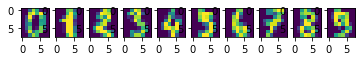

In [126]:
digits = load_digits()
fig, ax = plt.subplots(1, 10)

ax[0].imshow(digits.images[0])
ax[1].imshow(digits.images[1])
ax[2].imshow(digits.images[2])
ax[3].imshow(digits.images[3])
ax[4].imshow(digits.images[4])
ax[5].imshow(digits.images[5])
ax[6].imshow(digits.images[6])
ax[7].imshow(digits.images[7])
ax[8].imshow(digits.images[8])
ax[9].imshow(digits.images[9])

X = digits ['data']
labels = digits ['target']
print (labels)

### Реализуем алгоритм "Метод главных компонент" (PCA) в виде класса my_PCA.

Метод init сохраняет параметр n_components во внутреннюю переменную self.n_components.

Внутри метода fit:
1. центрирование данных: $ {X_c} = X - \overline{X} $, где $ \overline{X} $ - среднее для каждого параметра
2. вычисление матрицы ковариации: $ {X_c} = {X_c}^T{X_c}$
3. вычисление собственных векторов F и собственных значений lambda матрицы ковариации C (использовали функцию np.linalg.eigh)

Внутри метода transform:
1. преобразование данных в координаты в базисе главных компонент: $ Y ={X_c}F $


In [127]:
class my_PCA(): 
    def __init__(self, n_components=None):
        self.n_components = n_components    
    
    def fit(self, X): 
        X_new = X
        mean_X = np.mean(X_new, axis=0)
        Xc = X_new - mean_X
        C = np.transpose(Xc).dot(Xc)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:,::-1]
        return Xc, F     
    
    def transform(self, X, F): 
        Y = X.dot(F)
        return Y  
    
    def fit_transform(self, X):
        Xc, F = self.fit(X)
        Y = self.transform(Xc, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

Строим график точек датасета в первых двух координатах главных компонент так, чтобы разным цифрам соответствовали разные цвета.

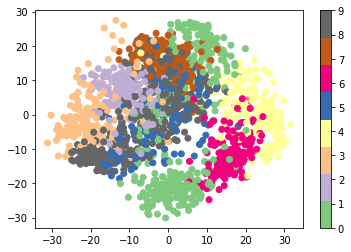

In [128]:
test = my_PCA(2)
Y = test.fit_transform(X)
plt.scatter(Y[:,0], Y[:,1], c = labels, cmap = 'Accent')
plt.colorbar()

### Реализуем алгоритм "k-ближайщих соседей" (kNN) в виде класса my_kNN.
Метод init сохраняет параметр n_neighbors во внутреннюю переменную self.n_neighbors.

Аналогично метод fit сохраняет переданные обучающие данные X_train и y_train во внутренние переменные self.X_train и self.y_train соответственно.

В методе predict реализуем основные вычисления для каждого неизвестного объекта:
1. находим для неизвестного объекта расстояние от него до известных/обучающих объектов в многомерном пространстве 
2. находим индексы отсортированных в порядке неубывания расстояний
3. выбираем из этих индексов первые k штук
4. сопоставляем полученные индексы с классами объектов
5. из полученных классов объектов выбираем тот, который встречается чаще всего - это и есть наш искомый класс

In [129]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
        self.n_neighbors = n_neighbors  
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X): 
        classes = list()
        for point in X:
            norms = list() #для каждого объекта будет храниться набор расстояний до обучающих объектов
            
            for point_train in self.X_train:
                # ищем расстояние 
                norm = np.linalg.norm(np.array(point) - np.array(point_train)) 
                norms.append(norm)
                
            norms_sort = np.argsort(norms) # получаем индексы 
            minimum_norms = norms_sort[:self.n_neighbors] # выбраем первые k индексов 
            object_class = list()
            
            # сопоставляем индексы с классами объектов
            for j in minimum_norms:
                object_class.append(self.y_train[j])
                
            # находим класс, который встречается чаще всего
            object_class_set = set(object_class)
            our_class = None 
            c_our_class = 0
            for k in object_class_set:
                c = object_class.count(k)
                if c > c_our_class:
                    c_our_class = c 
                    our_class = k 
            classes.append(our_class)
        return classes

Разбиваем данные X и labels на обучающую и тестовую выборку, используя функцию train_test_split из модуля sklearn.model_selection.

Создаем классификатор my_kNN с разным числом соседей от 1 до 30 с шагом 5. Обучаем классификатор на обучающих данных и считаем точность на тестовой выборке, используя функцию accuracy_score из модуля sklearn.metrics. Получившаяся точность значительно превышает 10%.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.33, random_state = 42)

for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629


Уменьшаем  размерность  данных  с  помощью  реализованного  ранее  метода  главных компонент.  Применяем  алгоритм  k-ближайших  соседей  к  преобразованным  данным. Смотрим точность при разном количестве главных компонент и разном количестве соседей. 

Наилучшая точность получается при максимальном количестве главных компонент = 64 и количестве соседей = 6.

In [131]:
test = my_PCA(1)
Y = test.fit_transform(X)
print ("Количество компонент = 1")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 1
Точность при k = 1 : 26.936026936026934
Точность при k = 6 : 32.323232323232325
Точность при k = 11 : 34.34343434343434
Точность при k = 16 : 36.53198653198653
Точность при k = 21 : 37.03703703703704
Точность при k = 26 : 36.36363636363637


In [132]:
test = my_PCA(5)
Y = test.fit_transform(X)
print ("Количество компонент = 5")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 5
Точность при k = 1 : 91.41414141414141
Точность при k = 6 : 92.92929292929293
Точность при k = 11 : 91.91919191919192
Точность при k = 16 : 91.91919191919192
Точность при k = 21 : 91.58249158249158
Точность при k = 26 : 91.75084175084174


In [133]:
test = my_PCA(10)
Y = test.fit_transform(X)
print ("Количество компонент = 10")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 10
Точность при k = 1 : 97.81144781144782
Точность при k = 6 : 97.81144781144782
Точность при k = 11 : 96.96969696969697
Точность при k = 16 : 95.62289562289563
Точность при k = 21 : 94.61279461279462
Точность при k = 26 : 94.27609427609428


In [134]:
test = my_PCA(20)
Y = test.fit_transform(X)
print ("Количество компонент = 20")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 20
Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 98.82154882154882
Точность при k = 11 : 98.82154882154882
Точность при k = 16 : 97.47474747474747
Точность при k = 21 : 96.96969696969697
Точность при k = 26 : 95.95959595959596


In [135]:
test = my_PCA(64)
Y = test.fit_transform(X)
print ("Количество компонент = 64")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 64
Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629
